In [20]:

import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

def calculate_natural_moments(xs, ys):
    # A*x = c*b
    A = (+ np.eye(len(ys)-2, k=1, dtype=float) * 1
         + np.eye(len(ys)-2, k=0, dtype=float) * 4
         + np.eye(len(ys)-2, k=-1, dtype=float) * 1)

    c = 6 / (xs[1]-xs[0])**2
    b = ys[2:] - 2*ys[1:-1] + ys[:-2]
    
    m = np.linalg.solve(A, c * b)
    
    return np.concatenate(([0.], m, [0.]))

def calculate_periodical_moments(xs, ys):
    # A*x = c*b
    A = (+ np.eye(len(ys)-1, k=1, dtype=float) * 1
         + np.eye(len(ys)-1, k=0, dtype=float) * 4
         + np.eye(len(ys)-1, k=-1, dtype=float) * 1)
    A[0, len(ys)-2] = 1
    A[len(ys)-2, 0] = 1

    c = 6 / (xs[1]-xs[0])**2
    b = np.roll(ys[1:], -1) - 2*ys[1:] + ys[:-1]
    
    m = np.linalg.solve(A, c * b)
    
    return np.concatenate(([m[-1]], m))

def s(x, xs, ys, ms):
    i_i1 = np.argmax(xs >= x)
    i_i = i_i1 - 1
        
    m_i = ms[i_i]
    m_i1 = ms[i_i1]
    x_i = xs[i_i]
    x_i1 = xs[i_i1]
    y_i = ys[i_i]
    y_i1 = ys[i_i1]
    h = x_i1 - x_i

    return (+ 1/(6*h) * ((x_i1-x)**3 * m_i + (x-x_i)**3 * m_i1) 
            + 1/h * ((x_i1-x) * y_i + (x-x_i) * y_i1)
            - h/6 * ((x_i1-x) * m_i + (x-x_i) * m_i1))

def s_m(x, xs, ys, ms):
    ys_fitted = []
    for i_x in x:
        ys_fitted.append(s(i_x, xs, ys, ms))
    return ys_fitted


x = np.array([2, 4, 6, 8, 10, 12, 14], dtype=float)
y = np.array([2, 3, 4, 2, 8, 7, 3], dtype=float)

moments = calculate_natural_moments(x, y)
moments

array([ 0.  ,  0.6 , -2.41,  4.53, -3.71, -0.2 ,  0.  ])

In [21]:
moments = calculate_periodical_moments(x, y)
moments

array([ 1.62,  0.17, -2.28,  4.47, -3.58, -0.63,  1.62])

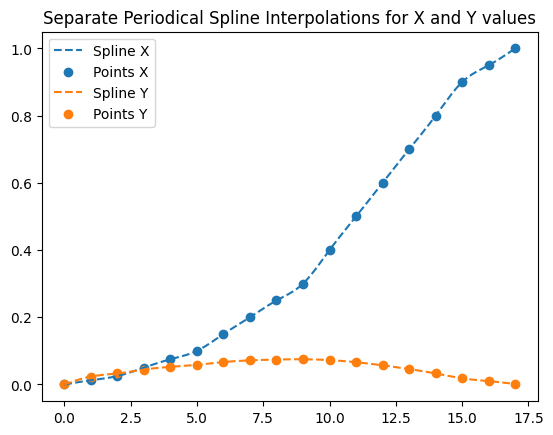

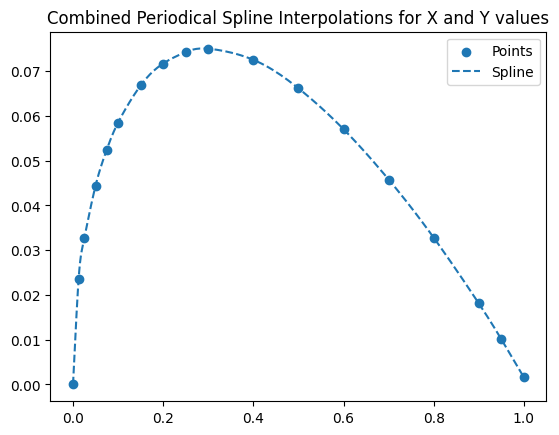

In [28]:
# import naca
data = np.genfromtxt('13_NACA_0015.txt')

t = np.arange(start=0, stop=len(data), step=1)
x = data[:, 0]
y = data[:, 1]

# interpolate x and y separately
ts_fitted = np.linspace(t[0], t[-1], 200)

mx = calculate_natural_moments(t, x)
xs_fitted = s_m(ts_fitted, t, x, mx)
plt.plot(ts_fitted, xs_fitted, label="Spline X", linestyle="--")
plt.scatter(t, x, label="Points X")

my = calculate_natural_moments(t, y)
ys_fitted = s_m(ts_fitted, t, y, my)
plt.plot(ts_fitted, ys_fitted, label="Spline Y", linestyle="--")
plt.scatter(t, y, label="Points Y")
plt.legend()
plt.title("Separate Periodical Spline Interpolations for X and Y values")
plt.show()

# combine
plt.scatter(x, y, label="Points")
plt.plot(xs_fitted, ys_fitted, label="Spline", linestyle="--")
plt.legend()
plt.title("Combined Periodical Spline Interpolations for X and Y values")
plt.show()